In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
with np.load("iMac.npz") as data:
    Ns=data["Ns"]
    avgDegs=data["avgDegs"]
    imac_weighted_avgs=data["weighted_avgs"]
    imac_weighted_stds=data["weighted_stds"]
    imac_unweighted_avgs=data["unweighted_avgs"]
    imac_unweighted_stds=data["unweighted_stds"]

In [3]:
with np.load("linux-tom.npz") as data:
    linux_unweighted_avgs = np.array([time.average for time in data["arr_0"]])
    linux_unweighted_stds = np.array([time.stdev for time in data["arr_0"]])
    linux_weighted_avgs = np.array([time.average for time in data["arr_1"]])
    linux_weighted_stds = np.array([time.stdev for time in data["arr_1"]])

In [4]:
def fitFunc(x, c):
    return c*x*np.log(x)

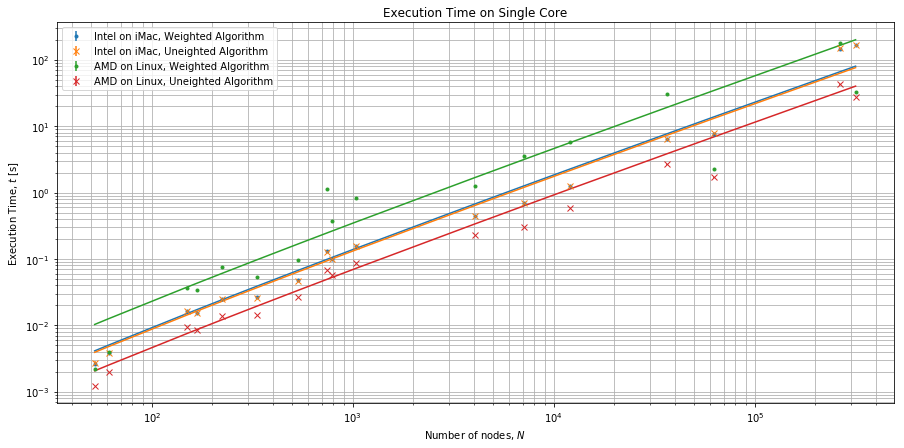

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
im_w_set = axs.errorbar(Ns, imac_weighted_avgs, imac_weighted_stds, fmt='.')
im_uw_set = axs.errorbar(Ns, imac_unweighted_avgs, imac_unweighted_stds, fmt='x')
li_w_set = axs.errorbar(Ns, linux_weighted_avgs, linux_weighted_stds, fmt='.')
li_uw_set = axs.errorbar(Ns, linux_unweighted_avgs, linux_unweighted_stds, fmt='x')
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_title("Execution Time on Single Core")
axs.legend(["Intel on iMac, Weighted Algorithm",
            "Intel on iMac, Uneighted Algorithm",
            "AMD on Linux, Weighted Algorithm",
            "AMD on Linux, Uneighted Algorithm"])

axs.plot(Ns, fitFunc(Ns, 2e-5), color=im_w_set.lines[0].get_color())
axs.plot(Ns, fitFunc(Ns, 1.9e-5), color=im_uw_set.lines[0].get_color())
axs.plot(Ns, fitFunc(Ns, 5e-5), color=li_w_set.lines[0].get_color())
axs.plot(Ns, fitFunc(Ns, 1e-5), color=li_uw_set.lines[0].get_color())

axs.set_xlabel("Number of nodes, $N$")
axs.set_ylabel("Execution Time, $t$ [s]")
axs.grid(True, which="both")